In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import warnings
warnings.simplefilter('ignore')

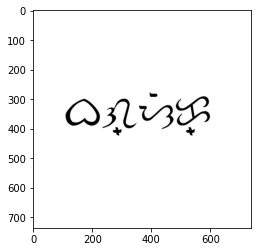

In [2]:
# Download data
image_file = '../Test/BAGSIK.jpg'
image_test = cv2.imread(image_file)
plt.imshow(image_test)
plt.show()

In [11]:
def digits_finder(image_file: str, erode_kernel=48, threshold_basic=100, out_size=32):
    # Find digits on the image_file and transform it to [-1, out_size, out_size, 1]
    
    image_test = cv2.imread(image_file)
    gray_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_test, threshold_basic, 255, cv2.THRESH_BINARY)
    image_erode = cv2.erode(thresh, np.ones((40, 1), np.uint8), iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(image_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    output = image_erode.copy()

    digits = []
    j = 0
    labels = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        #if (hierarchy[0][idx][3] == 0):
        if (hierarchy[0][idx][3] == 0) and (w*h>3000):
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            digit_crop = image_erode[y:y + h, x:x + w]

            # Resize digit canvas to square
            size_max = max(w, h)
            print(j, w*h)
            digit_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                y_pos = size_max//2 - h//2
                digit_square[y_pos:y_pos + h, 0:w] = digit_crop
            elif w < h:
                x_pos = size_max//2 - w//2
                digit_square[0:h, x_pos:x_pos + w] = digit_crop
            else:
                digit_square = digit_crop
            
            # Resize digit to 28x28 and add digit and its X-coordinate
            digits.append((x,(cv2.resize(digit_square, (out_size, out_size), interpolation=cv2.INTER_AREA))))
            labels.append(str(j))
            j += 1
            

    # Sort array in place by X-coordinate
    digits.sort(key=lambda x: x[0], reverse=False)
    
    # Tranform digits to tensor
    digits_new =[]
    for i in range(len(digits)):
        digits_new.append(digits[i][1])
    digits_res = np.reshape(digits_new, (j, 32, 32, 1))
    digits_res = np.where(digits_res > 225, 255, digits_res)
    digits_res = np.where(digits_res < 125, 0, digits_res)

    return digits_res, labels

In [12]:
X_user_test, Y_user_test = digits_finder(image_file, threshold_basic=100)

0 14157
1 19140
2 15458
3 20241


In [13]:
def plot_images_test(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    plt.gray()
    for i in range(len(Y)):        
        plt.subplot(1,len(Y),i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(X[i]))
        plt.xlabel(Y[i])
    plt.show()

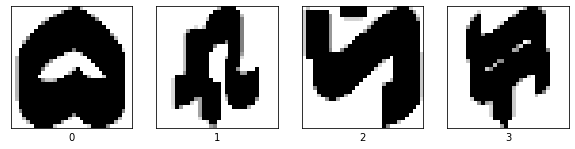

In [14]:
plot_images_test(X_user_test, Y_user_test)